# Bringing it all together

This notebook aims to combine the 3 concepts that you have learnt from Distributions, CI to Hypothesis Testing to give you and idea of how you would work from A to Z.

The data cleaning is not included to keep it brief and focused.

---
# Case Study: Effect of Discount Promotion on Sales Volume

Business Context
A local bookstore, “ReadMore,” ran a discount promotion for one month and wants to evaluate its impact on sales volume. 

The store has collected data on the number of items sold per day before and during the promotion period.




The dataset contains the following columns:

        Day: The day of the sales data.

        Items_Sold_Before: Number of items sold per day before the promotion.

        Items_Sold_During: Number of items sold per day during the promotion.



In [1]:
# The dataset

import pandas as pd

# Create DataFrame from the dataset
data = {
    'Items_Sold_Before': [40, 45, 50, 43, 42, 47, 48, 46, 44, 49],
    'Items_Sold_During': [55, 60, 70, 65, 68, 72, 75, 62, 69, 73]
}
df = pd.DataFrame(data)

# Steps to Analyze the Data


## Step 1: Understand the Data Type

 What Data type are you working with?




Your answer here:


<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p>Items_Sold_Before and Items_Sold_During are continuous variables representing the number of items sold.
<p>
  
</details>

## Step 2: Identify the Analytical Question

Your answer here:


<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p>Question: Did the discount promotion lead to an increase in the number of items sold?
<p>
  
</details>




## Step 3: Calculate Descriptive Stats

In [2]:
# Compute descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)

       Items_Sold_Before  Items_Sold_During
count          10.000000          10.000000
mean           45.400000          66.900000
std             3.204164           6.332456
min            40.000000          55.000000
25%            43.250000          62.750000
50%            45.500000          68.500000
75%            47.750000          71.500000
max            50.000000          75.000000


## Step 4: Interpret the Graph and Descriptive Stats

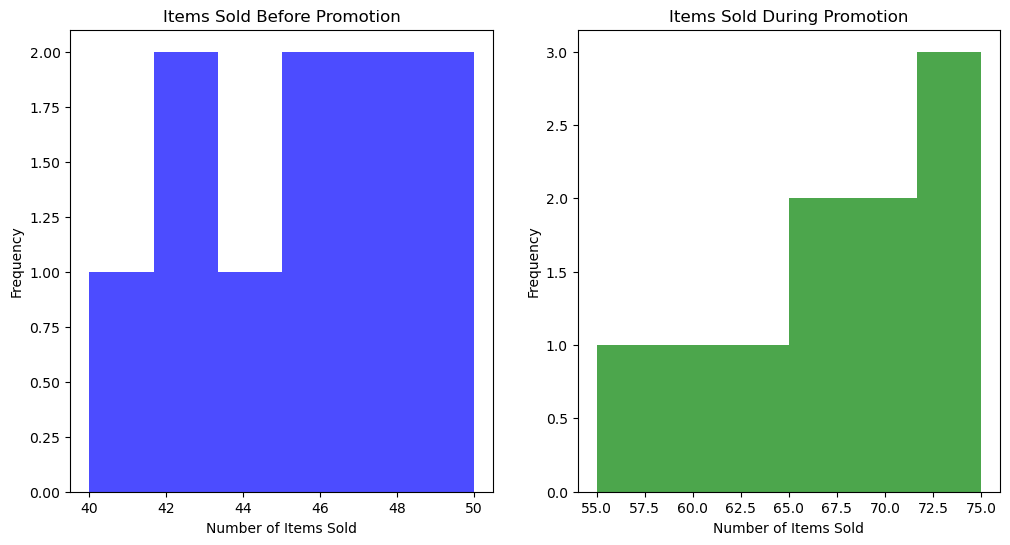

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Items_Sold_Before'], bins=6, alpha=0.7, color='blue')
plt.title('Items Sold Before Promotion')
plt.xlabel('Number of Items Sold')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Items_Sold_During'], bins=6, alpha=0.7, color='green')
plt.title('Items Sold During Promotion')
plt.xlabel('Number of Items Sold')
plt.ylabel('Frequency')

plt.show()


## Intepretation:

Does not look normally distributed hence a transformation or non-parametric test would be appropriate

## Step 5: (ADDITIONAL/OPTIONAL) **NEW** Check for Normality with Q-Q plots

### What is a Q-Q Plot?

- **Definition:**

        A Q-Q plot is a scatter plot that shows the quantiles of your sample data against the quantiles of a theoretical distribution. 

        If your data is normally distributed, the points on the plot will lie approximately along a straight line (typically the line y=x).

- **Purpose:** 

        The Q-Q plot helps to visually assess whether the distribution of your data matches the theoretical distribution you're testing against. 

        It's particularly useful for checking normality.

### How to Interpret a Q-Q Plot

- **Straight Line:**

        If the points on the Q-Q plot lie approximately along the diagonal line (often 
        y=x), it suggests that the data follows the theoretical distribution (e.g., normal distribution).

        Deviations from this line indicate deviations from the theoretical distribution.

- **S-Shaped Curve:**

        If the plot shows an S-shaped curve (concave up or down), this indicates that the data has heavier tails than the theoretical distribution. 

        For a normal distribution, this suggests that the data may be more peaked or more spread out than a normal distribution.

- **Bulging or Clustering:**

        If points bulge away from the line in the middle or at the ends, it may suggest that the data has a distribution with more extreme values or a different shape than the theoretical distribution.

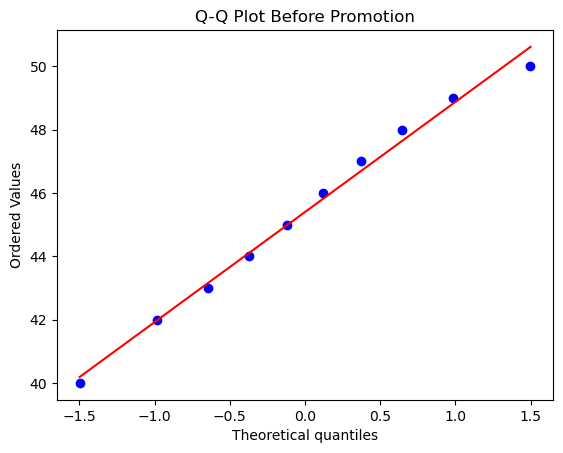

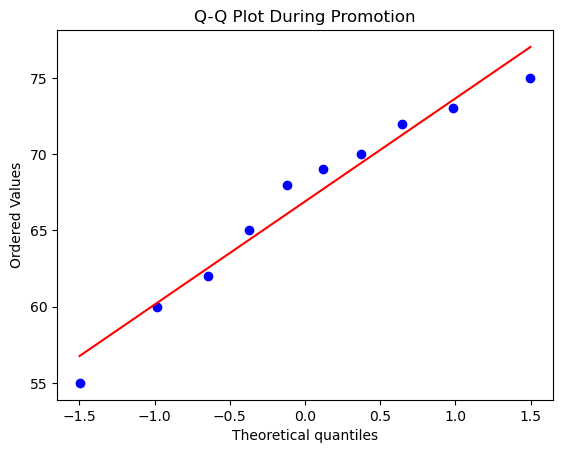

In [4]:
import scipy.stats as stats

# Q-Q plot for items sold before promotion
stats.probplot(df['Items_Sold_Before'], dist="norm", plot=plt)
plt.title('Q-Q Plot Before Promotion')
plt.show()

# Q-Q plot for items sold during promotion
stats.probplot(df['Items_Sold_During'], dist="norm", plot=plt)
plt.title('Q-Q Plot During Promotion')
plt.show()



## Intepretation

Points Along the Line: The points on the Q-Q plot for Items_Sold_Before lie close to the diagonal line, this suggests that the data is approximately normally distributed.

Points Along the Line: If the points for Items_Sold_During align closely with the diagonal line, it suggests that the distribution of items sold during the promotion is approximately normal.



## Verifying with the Shapiro-Wilk Test.

        P-value of < 0.05 would indicate that the distribution is not normal.


In [5]:
# Shapiro-Wilk test
# _ is a throwaway variable we are not really interested in this value 
# but rather only the p-value
_, p_before = stats.shapiro(df['Items_Sold_Before'])  
_, p_during = stats.shapiro(df['Items_Sold_During'])
print(f'Shapiro-Wilk p-value (Before): {p_before}')
print(f'Shapiro-Wilk p-value (During): {p_during}')

Shapiro-Wilk p-value (Before): 0.9696929454803467
Shapiro-Wilk p-value (During): 0.7075570821762085


        Since the data is Normal/ Close to Normal we do not need to apply any Transformations or use a Non-Parametric Test

## Step 6: Formulate and Test Hypotheses

        Null Hypothesis (H₀): The average number of items sold before and during the promotion is the same.

        Alternative Hypothesis (H₁): The average number of items sold before and during the promotion is different.




In [6]:
## Perform a paired t-test
t_stat, p_value = stats.ttest_rel(df['Items_Sold_Before'], df['Items_Sold_During'])
print(f'T-test Statistic: {t_stat}, p-value: {p_value}')


T-test Statistic: -14.47702949059428, p-value: 1.5347327208227585e-07


Your interpretation of the result:


<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p>Conclusion:
The results suggest that the discount promotion had a significant effect on increasing the number of items sold. Given the very small p-value, the observed increase in sales during the promotion is highly unlikely to be due to random chance alone.

<p>
  
</details>



---
# Case Study: Evaluating Average Customer Satisfaction Scores

Business Context
A company recently launched a new product and conducted a survey to gauge customer satisfaction. 

The company’s target satisfaction score for new products is 8.0 out of 10. 

After collecting feedback from a sample of 15 customers, the company wants to determine if their new product's average satisfaction score significantly differs from this target score.



In [7]:
import pandas as pd

# Create DataFrame
data = {
    'Satisfaction_Score': [7.5, 8.1, 7.8, 8.3, 8.0, 7.9, 8.4, 7.6, 8.2, 8.1, 7.7, 8.5, 7.4, 8.0, 8.3]
}
df = pd.DataFrame(data)

## Step 1: Understand the Data Type


Your answer here:




<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p>Satisfaction_Score is continuous and represents customer satisfaction on a 10-point scale.
</p>
  
</details>

## Step 2: Identify the Analytical Question:

Your answer here:


<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p>Question: Is the average customer satisfaction score for the new product significantly different from the company’s target score of 8.0?</p>
  
</details>



## Step 3: Calculate Descriptive Statistics

In [8]:
# Compute descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)


       Satisfaction_Score
count           15.000000
mean             7.986667
std              0.333524
min              7.400000
25%              7.750000
50%              8.000000
75%              8.250000
max              8.500000


## Step 4: Visualise the Distribution


In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Histogram
plt.hist(df['Satisfaction_Score'], bins=5, alpha=0.7, color='blue')
plt.title('Histogram of Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.show()



## Step 5: Check Normality

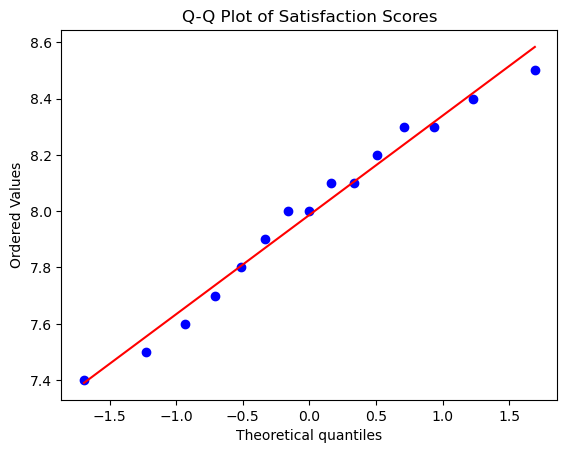

In [9]:
# Q-Q Plot
stats.probplot(df['Satisfaction_Score'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Satisfaction Scores')
plt.show()


### Confirm with Shapiro-Wilk Test

In [10]:
# Shapiro-Wilk test for normality
_, p_value = stats.shapiro(df['Satisfaction_Score'])
print(f'Shapiro-Wilk p-value: {p_value}')


Shapiro-Wilk p-value: 0.8190560936927795


## Step 6: Formulate and Test Hypotheses

    Null Hypothesis (H₀): The average satisfaction score is equal to 8.0.
    
    Alternative Hypothesis (H₁): The average satisfaction score is not equal to 8.0.

## Step 7: Test

In [11]:
# One-sample t-test
mu = 8.0
t_stat, p_value = stats.ttest_1samp(df['Satisfaction_Score'], mu)
print(f'T-test Statistic: {t_stat}, p-value: {p_value}')


T-test Statistic: -0.15483088432133663, p-value: 0.8791646664799033


Your intepretation here:



<details>
  <summary>Compare Answer</summary>
  <h3>Answer:</h3>
  <p>

P-Value Interpretation:

    
    A p-value of 0.879 is much greater than 0.05. 

    This indicates that there is no significant evidence to reject the null hypothesis.

    Therefore, you fail to reject the null hypothesis that the average customer satisfaction score is equal to 8.0.

Business Implications

Customer Satisfaction:

    The analysis suggests that the average satisfaction score of the new product is not significantly different from the target score of 8.0.

    From a business perspective, this means that the new product meets the company's satisfaction target based on this sample.

</p>
  
</details>